符号计算
====================

象征
-----

在本节中，我们介绍SymPy（SYMbolic Python）库的一些基本功能。与数值计算（涉及数字）相反，在符号计算中，我们正在处理和转换通用变量。

SymPy主页为<http://sympy.org/>，并提供此库的完整（最新）文档。

与浮点运算相比，符号计算非常慢（例如，请参见[小数符号计算]（13-numeric-computation.ipynb＃Symbolic-calculation）），因此通常不用于直接仿真。但是，它是支持编写代码和符号工作的强大工具。有时，在执行模拟之前，我们会在模拟中使用符号运算来计算出最有效的数字代码。

### 输出

在开始使用sympy之前，我们将调用`init_printing`。这告诉sympy以更好的格式显示表达式。

In [1]:
import sympy
sympy.init_printing()

### 符号

在执行任何符号操作之前，我们需要使用SymPy的`Symbol`函数创建符号变量：

In [2]:
from sympy import Symbol
x = Symbol('x')
type(x)

sympy.core.symbol.Symbol

In [3]:
y = Symbol('y')
2 * x - x

In [4]:
x + y + x + 10*y

In [5]:
y + x - y + 10

我们可以使用`symbols`函数来简化多个符号变量的创建。例如，要创建符号变量`x`，`y`和`z`，我们可以使用

In [6]:
import sympy
x, y, z = sympy.symbols('x,y,z')
x + 2*y + 3*z - x

完成术语处理后，有时我们希望为变量插入数字。可以使用`subs`方法来完成。

In [7]:
from sympy import symbols
x, y = symbols('x,y')
x + 2*y

In [8]:
x + 2*y.subs(x, 10)

In [9]:
(x + 2*y).subs(x, 10)

In [10]:
(x + 2*y).subs(x, 10).subs(y, 3)

In [11]:
(x + 2*y).subs({x:10, y:3})

我们还可以将符号变量替换为另一个变量，例如在本示例中，在将`x`替换为数字`2`之前，将`y`替换为`x`。

In [12]:
myterm = 3*x + y**2
myterm

In [13]:
myterm.subs(x, y)

In [14]:
myterm.subs(x, y).subs(y, 2)

从现在开始，我们介绍的一些代码片段和示例将假定所需的符号已经定义。如果您尝试一个示例，而SymPy给出类似` NameError：name'x'not defined`的消息，则可能是因为您需要使用上述方法之一来定义符号。

### isympy

`isympy`可执行文件是ipython的包装器，它创建符号（实数）变量`x`，`y`和`z`，符号整数变量`k`，`m`和`n`以及符号函数变量。 `f`，`g`和`h`，并从SymPy顶层导入所有对象。

这很容易找出新功能或进行交互式实验

    $> isympy
    适用于SymPy 0.6.7的Python 2.6.5控制台

    这些命令已执行：
    >>>来自__未来__进口部门
    >>>从sympy导入*
    >>> x，y，z =符号（'xyz'）
    >>> k，m，n =符号（'kmn'，整数= True）
    >>> f，g，h = map（Function，'fgh'）

    可以在http://sympy.org/找到文档。

    在[1]中：

### 数值类型

SymPy具有数字类型` Rational` 和 `RealNumber`。有理数类将有理数表示为两个整数对：分子和分母，因此，`Rational（1,2）`代表`1/2`，`Rational（5,2）`代表`5/2`等等。

In [15]:
from sympy import Rational

In [16]:
a = Rational(1, 10)
a

In [17]:
b = Rational(45, 67)
b

In [18]:
a * b

In [19]:
a - b

In [20]:
a + b

请注意，Rational类与*exactly*有理表达式一起使用。这与Python的标准 `float` 数据类型相反，后者使用浮点表示法表示*近似*（有理数）。

我们可以使用`float`或Rational对象的`evalf`方法将`sympy.Rational`类型转换为Python浮点变量。`evalf`方法可以使用一个参数，该参数指定应为浮点近似计算多少个数字（当然，并非所有这些数字都可以由Python的浮点类型使用）。

In [21]:
c = Rational(2, 3)
c

In [22]:
float(c)

In [23]:
c.evalf()

In [24]:
c.evalf(50)

### 差异化与整合

SymPy能够执行许多功能的区分和集成：

In [25]:
from sympy import Symbol, exp, sin, sqrt, diff
x = Symbol('x')
y = Symbol('y')
diff(sin(x), x)

In [26]:
diff(sin(x), y)

In [27]:
diff(10 + 3*x + 4*y + 10*x**2 + x**9, x)

In [28]:
diff(10 + 3*x + 4*y + 10*x**2 + x**9, y)

In [29]:
diff(10 + 3*x + 4*y + 10*x**2 + x**9, x).subs(x,1)

In [30]:
diff(10 + 3*x + 4*y + 10*x**2 + x**9, x).subs(x,1.5)

In [31]:
diff(exp(x), x)

In [32]:
diff(exp(-x ** 2 / 2), x)

SymPy`diff（）`函数至少接受两个参数：要微分的函数和要进行微分的变量。高阶导数可以通过指定其他变量或添加可选的整数参数来计算：

In [33]:
diff(3*x**4, x)

In [34]:
diff(3*x**4, x, x, x)

In [35]:
diff(3*x**4, x, 3)

In [36]:
diff(3*x**4*y**7, x, 2, y, 2)

In [37]:
diff(diff(3*x**4*y**7, x, x), y, y)

有时，SymPy可能会以不熟悉的形式返回结果。例如，如果您希望使用SymPy来检查是否正确区分了某些内容，则可能有用的技术是从结果中减去SymPy的结果，并检查答案是否为零。

以一个多平方径向基函数，带有$r=\sqrt{x^2+y^2}$和*σ*为常数的$\phi(r)=\sqrt{r^2+\sigma^2}$的简单示例为例，我们可以验证*x*中的一阶导数是$\partial\phi/\partial x=x/\sqrt{r^2+\sigma^2}$。

在此示例中，我们首先要求SymPy打印派生词。看到它以与我们的试验导数不同的形式印刷，但是减法验证它们是相同的：

In [38]:
r = sqrt(x**2 + y**2)
sigma = Symbol('σ')
def phi(x,y,sigma):
    return sqrt(x**2 + y**2 + sigma**2)

mydfdx= x / sqrt(r**2 + sigma**2)
print(diff(phi(x, y, sigma), x))

x/sqrt(x**2 + y**2 + σ**2)


In [39]:
print(mydfdx - diff(phi(x, y, sigma), x))

0


在没有SymPy的帮助下，告诉我们表达式是相同的，这很简单，但是在更复杂的示例中，可能会有更多的术语，并且试图将我们的试验导数和SymPy的答案重新排列成越来越困难，费时且容易出错。相同的形式。在这种情况下，这种减法技术最为有用。

集成使用类似的语法。对于不确定的情况，请指定要执行积分的函数和变量：

In [40]:
from sympy import integrate
integrate(x**2, x)

In [41]:
integrate(x**2, y)

In [42]:
integrate(sin(x), y)

In [43]:
integrate(sin(x), x)

In [44]:
integrate(-x*exp(-x**2/2), x)

我们可以通过向 `integrate（）` 提供一个包含感兴趣变量，上下限的元组来计算定积分。如果指定了多个变量，则执行多次积分。当SymPy返回 `Rational` 类中的结果时，可以以任何所需的精度将其评估为浮点表示形式（请参阅[数字类型](#Numeric-types)）。

In [45]:
integrate(x*2, (x, 0, 1))

In [46]:
integrate(x**2, x)

In [47]:
integrate(x**2, x, x)

In [48]:
integrate(x**2, x, x, y)

In [49]:
integrate(x**2, (x, 0, 2))

In [50]:
integrate(x**2, (x, 0, 2), (x, 0, 2), (y, 0, 1))

In [51]:
float(integrate(x**2, (x, 0, 2)))

In [52]:
type(integrate(x**2, (x, 0, 2)))

sympy.core.numbers.Rational

In [53]:
result_rational=integrate(x**2, (x, 0, 2))
result_rational.evalf()

In [54]:
result_rational.evalf(50)

### 常微分方程

SymPy通过其 `dsolve` 命令内置了对多种常微分方程求解的支持。我们需要设置ODE并将其作为第一个参数 `eq`传递。第二个参数是要求解的函数 `f（x）`。可选的第三个参数 `hint` 会影响 `dsolve` 使用的方法：某些方法更适合某些ODE类，或者比其他方法更简单地表示该解决方案。

要设置ODE求解器，我们需要一种方法来引用我们要为其求解的未知函数及其派生函数。`Function`和`Derivative`类有助于实现这一点：

In [55]:
from sympy import Symbol, dsolve, Function, Derivative, Eq
y = Function("y")
x = Symbol('x')
y_ = Derivative(y(x), x)
dsolve(y_ + 5*y(x), y(x))

注意`dsolve`是如何引入积分常数`C1`的。它会引入所需数量的常量，它们都将被命名为`Cn`，其中`n`是整数。还要注意，除非我们使用`Eq()`函数指定否则，`dsolve`的第一个参数将被视为等于零。

In [56]:
dsolve(y_ + 5*y(x), y(x))

In [57]:
dsolve(Eq(y_ + 5*y(x), 0), y(x))

In [58]:
dsolve(Eq(y_ + 5*y(x), 12), y(x))

`dsolve`的结果是`Equality`类的一个实例。当我们希望对函数进行数值评估并在其他地方使用结果（例如，如果要绘制*y*（*x*）对*x*的结果（*e.g.* ）时，会产生后果），因为即使在使用了`subs（）`和`evalf（）`之后，我们仍然有一个`Equality`，而不是任何标量。将函数评估为数字的方法是通过`Equality`的`rhs`属性。

请注意，这里我们使用`z`来存储`dsolve`返回的`Equality`，即使它是名为`y（x）`的函数的表达式，也要强调`Equality`本身与它包含的数据。

In [59]:
z = dsolve(y_ + 5*y(x), y(x))
z

In [60]:
type(z)

sympy.core.relational.Equality

In [61]:
z.rhs

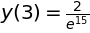

In [62]:
C1=Symbol('C1')
y3 = z.subs({C1:2, x:3})
y3

In [63]:
y3.evalf(10)

In [64]:
y3.rhs

In [65]:
y3.rhs.evalf(10)

In [66]:
z.rhs.subs({C1:2, x:4}).evalf(10)

In [67]:
z.rhs.subs({C1:2, x:5}).evalf(10)

In [68]:
type(z.rhs.subs({C1:2, x:5}).evalf(10))

sympy.core.numbers.Float

有时，`dsolve`可能会返回过于笼统的解决方案。一个示例是当某些系数可能很复杂时。例如，如果我们知道它们始终是真实的和肯定的，那么我们可以提供`dsolve`信息，以避免解决方案变得不必要的复杂：

In [69]:
from sympy import *
a, x = symbols('a,x')
f = Function('f')
dsolve(Derivative(f(x), x, 2) + a**4*f(x), f(x))

In [70]:
a = Symbol('a',real=True,positive=True)
dsolve(Derivative(f(x), x, 2)+a**4*f(x), f(x))

### 系列扩展和绘图

可以将许多SymPy表达式扩展为泰勒级数。 `series`方法使这一过程变得简单。至少，我们必须指定表达式以及在其中进行扩展的变量。 （可选）我们还可以指定扩展点，最大术语数和扩展方向（有关更多信息，请尝试`help（Basic.series）`）。

In [71]:
from sympy import *
x = Symbol('x')
sin(x).series(x, 0)

In [72]:
series(sin(x), x, 0)

In [73]:
# NBVAL_IGNORE_OUTPUT
cos(x).series(x, 0.5, 10)

在某些情况下，特别是数值计算和绘制结果时，有必要去除尾随的`O（n）`项：

In [74]:
# NBVAL_IGNORE_OUTPUT
cos(x).series(x, 0.5, 10).removeO()

SymPy提供了两个内置的绘图功能，分别来自 `sympy.plotting` 模块的 `Plot（）` 和来自 `sympy.mpmath.visualization` 的 `plot`。在撰写本文时，这些功能缺乏向绘图添加键的功能，这意味着它们不适合我们的大多数需求。尽管如此，如果您希望使用它们，它们的`help（）`文本将很有用。

对于我们的大多数目的，Matplotlib应该是首选的绘图工具。详情见第章[cha:可视化数据]. 这里我们只提供一个例子来说明如何绘制一个SymPy计算的结果。

In [75]:
%matplotlib inline

In [76]:
from sympy import sin,series,Symbol
import pylab
x = Symbol('x')
s10 = sin(x).series(x,0,10).removeO()
s20 = sin(x).series(x,0,20).removeO()
s = sin(x)
xx = []
y10 = []
y20 = []
y = []
for i in range(1000):
  xx.append(i / 100.0)
  y10.append(float(s10.subs({x:i/100.0})))
  y20.append(float(s20.subs({x:i/100.0})))
  y.append(float(s.subs({x:i/100.0})))

pylab.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

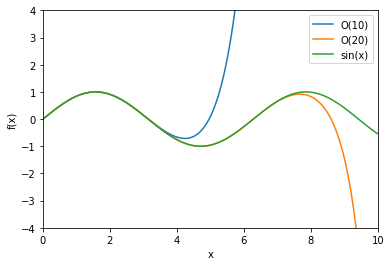

In [77]:
pylab.plot(xx, y10, label='O(10)')
pylab.plot(xx, y20, label='O(20)')
pylab.plot(xx, y, label='sin(x)')

pylab.axis([0, 10, -4, 4])
pylab.xlabel('x')
pylab.ylabel('f(x)')

pylab.legend()

### 线性方程和矩阵求逆

SymPy具有Matrix类和相关函数，这些函数允许线性方程组的符号解（当然，我们可以使用`subs（）`和`evalf（）`获得数值答案）。我们将考虑以下简单线性方程对的示例：

$$\begin{aligned}
3x + 7y&= 12z\\
4x - 2y&= 5z\end{aligned}$$

 我们可以用$A\vec{x}=\vec{b}$的形式编写此系统（如果要验证是否可以恢复原始方程式，请用$\vec{x}$乘以*A*），其中

$$A=\left(\begin{array}{cc}
3 & 7\\
4 & -2 \end{array} \right),\qquad
\vec{x}=\left(\begin{array}{c}
x\\
y \end{array}\right),\qquad
\vec{b}=\left( \begin{array}{c}
12z\\
5z \end{array}\right).$$

在这里，我们在右侧添加了一个符号*z*，以演示符号将传播到解决方案中。在许多情况下，我们会有*z* = 1，但是即使在解决方案不包含任何符号的情况下，也可以使用SymPy而不是数值求解器，因为它可以返回精确的分数而不是近似的`floats`。

解决$\vec{x}$的一种策略是将矩阵*A*求逆并预乘以*，即* $A^{-1}A\vec{x}=\vec{x}=A^{-1}\vec{b}$。 SymPy的`Matrix`类具有一个`inv（）`方法，使我们能够找到逆函数，而`*`可以在适当时为我们执行矩阵乘法：

In [78]:
from sympy import symbols,Matrix
x, y, z = symbols('x,y,z')
A = Matrix(([3, 7], [4, -2]))
A

⎡3  7 ⎤
⎢     ⎥
⎣4  -2⎦

In [79]:
A.inv()

⎡1/17  7/34 ⎤
⎢           ⎥
⎣2/17  -3/34⎦

In [80]:
b = Matrix(( 12*z,5*z  ))
b

⎡12⋅z⎤
⎢    ⎥
⎣5⋅z ⎦

In [81]:
x = A.inv()*b
x

⎡59⋅z⎤
⎢────⎥
⎢ 34 ⎥
⎢    ⎥
⎢33⋅z⎥
⎢────⎥
⎣ 34 ⎦

In [82]:
x.subs({z:3.3}).evalf(4)

⎡5.726⎤
⎢     ⎥
⎣3.203⎦

In [83]:
type(x)

sympy.matrices.dense.MutableDenseMatrix

解决相同问题的另一种方法是将系统构造为增强形式的矩阵。这是通过将（在我们的示例中）*A*和$\vec{b}$的列附加在一起获得的形式。扩充矩阵为[1]：

$$(A|\vec{b})=\left(\begin{array}{cc|c}
3 & 7 & 12z\\
4 & -2 & 5z\end{array} \right),$$

 像以前一样，将其构造为SymPy矩阵对象，但在这种情况下，我们将其传递给`solve_linear_system()`函数：

In [84]:
from sympy import Matrix, symbols, solve_linear_system
x, y, z = symbols('x,y,z')
system = Matrix(([3, 7, 12*z],[4, -2, 5*z]))
system

⎡3  7   12⋅z⎤
⎢           ⎥
⎣4  -2  5⋅z ⎦

In [85]:
sol = solve_linear_system(system,x,y)
sol

In [86]:
type(sol)

dict

In [87]:
# NBVAL_IGNORE_OUTPUT
for k in sol.keys():
    print(k,'=',sol[k].subs({z:3.3}).evalf(4))

x = 5.726
y = 3.203


第三种选择是 `solve（）` 方法，其参数包括单个符号方程式，而不是任何矩阵。像`dsolve（）`（参见[ODEs](#Ordinary-differential-equations)）一样，`solve（）`期望的表达式将假定为零，或者期望使用` Equality`对象，我们可以使用`Eq（）`：

In [88]:
from sympy import symbols,solve,Eq
x, y, z = symbols('x,y,z')
solve((Eq(3*x+7*y,12*z), Eq(4*x-2*y,5*z)), x, y)

In [89]:
solve((3*x+7*y-12*z, 4*x-2*y-5*z), x, y)

有关更多信息，请参见`help（solve）`和`help（solve _linear_ system）`。

### 非线性方程

让我们解决一个简单的方程式，例如
$x = x^2$。有两个明显的解决方案：*x* = 0和*x* = 1.我们如何要求Sympy为我们计算这些？

In [90]:
import sympy
x, y, z = sympy.symbols('x, y, z')        # create some symbols
eq = x - x ** 2                           # define the equation

In [91]:
sympy.solve(eq, x)                        # solve eq = 0

`solve（）`函数需要一个表示要求解的表达式，以便其求值为零。对于我们的示例，我们重写

*x* = *x*<sup>2</sup>
 如
*x* − *x*<sup>2</sup> = 0
 然后将其传递给solve函数。

让我们对方程式重复相同的操作：
*x* = *x*<sup>3</sup>
 并解决

In [92]:
eq = x - x ** 3                           # define the equation
sympy.solve(eq, x)                        # solve eq = 0

### 输出：LaTeX界面和精美打印

与许多计算机代数系统一样，SymPy能够将其输出格式化为LaTeX代码，以便轻松包含到文档中。

在本章开始时，我们调用：

```python
sympy.init_printing()
```

Sympy检测到它在Jupyter中，并启用了Latex输出。 Jupyter Notebook支持（某些）Latex，因此这为我们提供了格式精美的输出。

我们还可以看到Sympy的纯文本输出以及它创建的原始Latex代码：

In [1]:
print(series(1/(x+y), y, 0, 3))

NameError: name 'series' is not defined

In [94]:
print(latex(series(1/(x+y), y, 0, 3)))

\frac{y^{2}}{x^{3}} - \frac{y}{x^{2}} + \frac{1}{x} + O\left(y^{3}\right)


In [95]:
print(latex(series(1/(x+y), y, 0, 3), mode='inline'))

$\frac{y^{2}}{x^{3}} - \frac{y}{x^{2}} + 1 / x + O\left(y^{3}\right)$


请注意，在默认模式下，`latex（）`输出的代码要求通过文档序言中的`\backslashusepackage{amsmath}`命令加载`amsmath`包。

SymPy还支持“漂亮打印”（`pprint（）`）输出例程，该输出例程比默认打印例程产生格式更好的文本输出，如下所示。注意特征，例如名称形式为T_n的数组元素的下标，斜体常量*e*，用于乘法的垂直居中点以及格式良好的矩阵边界和分数。

<img src="static/images/sympy.png" alt="Nicely-formatted output from pprint()." style="width:60.0%" />

最后，SymPy提供了`preview（）`，它会在屏幕上显示渲染的输出（有关详细信息，请查看`help（preview）`）。

### 自动生成C代码

许多符号库的优点是它们可以将符号表达式转换为C代码（或其他代码），然后可以对其进行编译以提高执行速度。这是一个演示此的示例：

In [96]:
from sympy import *                                                                                    
from sympy.utilities.codegen import codegen                                                                            
x = Symbol('x')                                                                                                          
sin(x).series(x, 0, 6)

In [97]:
# NBVAL_IGNORE_OUTPUT
print(codegen(("taylor_sine",sin(x).series(x,0,6)), language='C')[0][1])

/******************************************************************************
 *                       Code generated with sympy 1.2                        *
 *                                                                            *
 *              See http://www.sympy.org/ for more information.               *
 *                                                                            *
 *                       This file is part of 'project'                       *
 ******************************************************************************/
#include "taylor_sine.h"
#include <math.h>

double taylor_sine(double x) {

   double taylor_sine_result;
   taylor_sine_result = x - 1.0/6.0*pow(x, 3) + (1.0/120.0)*pow(x, 5) + O(x**6);
   return taylor_sine_result;

}



相关工具
-------------

值得注意的是，SAGE<http://www.sagemath.org/>试图“创建可行的免费开源替代Magma，Maple，Mathematica和Matlab”,包括SymPy库等。它的符号功能比SymPy更强大，但是SymPy功能已经可以满足科学和工程领域的许多需求。 SAGE包括计算机代数系统Maxima，也可以从<http://maxima.sourceforge.net/>独立获得。